# Data Wrangling for [Recruit Restaurant Visitor Forecasting](https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting)
---
This document breaks down the data wrangling tasks into the following steps:

* **1 Load Datasets**: 

    Imports Python libraries and also loads the DataFrames.
    

* **2 Visual Inspection**: 

    Examines the shape, column names and data types used by all DataFrames.
    

* **3 Combine Datasets**: 

    Joins the DataFrames into a single entity.
    

* **4 Cleaning Data**: 

    Analyses the amount of work that needs to be done and performs the steps necessary to make the data tidy and clean.
    

* **5 Preliminary Visual Exploratory Data Analysis**: 

    Renders a chart that makes it easy to visualize the amount of reservations and visitations made along the years.

---
## 1 Load Datasets

In [1]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

air_reserve_df = pd.read_csv('data/air_reserve.csv')
air_store_df = pd.read_csv('data/air_store_info.csv')
air_visit_df = pd.read_csv('data/air_visit_data.csv')

hpg_reserve_df = pd.read_csv('data/hpg_reserve.csv')
hpg_store_df = pd.read_csv('data/hpg_store_info.csv')

date_info_df = pd.read_csv('data/date_info.csv')
store_ids_df = pd.read_csv('data/store_id_relation.csv')

---
## 2 Visual Inspection 
A brief examination of the dataframes involved helps to get a better sense of the data structures that are going to be manipulated.

In [2]:
def visual_inspect(df, size=3):
    display(df.head(size))
    print('>>> Shape =', df.shape)
    #print('>>> Columns =', df.columns)
    print('>>> Types\n', df.dtypes)
    #print('\n>>> Info')
    #df.info()
    #print('\n>>> Total sum of missing values:', df.isnull().sum().sum())

### 2.1 air_reserve.csv

In [3]:
visual_inspect(air_reserve_df)

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6


>>> Shape = (92378, 4)
>>> Types
 air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object


### 2.2 air_store_info.csv

In [4]:
visual_inspect(air_store_df)

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852


>>> Shape = (829, 5)
>>> Types
 air_store_id       object
air_genre_name     object
air_area_name      object
latitude          float64
longitude         float64
dtype: object


### 2.3 air_visit_data.csv

In [5]:
visual_inspect(air_visit_df)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29


>>> Shape = (252108, 3)
>>> Types
 air_store_id    object
visit_date      object
visitors         int64
dtype: object


### 2.4 hpg_reserve.csv

In [6]:
visual_inspect(hpg_reserve_df)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2


>>> Shape = (2000320, 4)
>>> Types
 hpg_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object


### 2.5 hpg_store_info.csv

In [7]:
visual_inspect(hpg_store_df)

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


>>> Shape = (4690, 5)
>>> Types
 hpg_store_id       object
hpg_genre_name     object
hpg_area_name      object
latitude          float64
longitude         float64
dtype: object


### 2.6 date_info.csv

In [8]:
visual_inspect(date_info_df)

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1


>>> Shape = (517, 3)
>>> Types
 calendar_date    object
day_of_week      object
holiday_flg       int64
dtype: object


### 2.7 store_id_relation.csv

In [9]:
visual_inspect(store_ids_df)

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9


>>> Shape = (150, 2)
>>> Types
 air_store_id    object
hpg_store_id    object
dtype: object


## 3 Combine Datasets
We start by joining AIR data from `air_reserve_df` and `air_store_df`, thus creating the `air_merged_df` dataframe. 

Then, we do the same with HPG data from `hpg_reserve_df` and `hpg_store_df` in `hpg_merged_df`. 

Next, both of these dataframes are merged into a single entity called `merged_df`, becoming the main dataframe used from here on out.

Finally, holyday information from `date_info_df` and historical visitation data from `air_visit_df` are incorporated to `merged_df`.

### 3.1 Join AIR dataframes based on key *air_store_id*

In [10]:
## First merge: ar_reserve_df and ar_store_df
air_merged_df = pd.merge(left=air_reserve_df, right=air_store_df, left_on='air_store_id', right_on='air_store_id')
print('>>> air_reserve_df shape=', air_reserve_df.shape)  # shape= (92378, 4)
print('>>> air_store_df   shape=', air_store_df.shape)    # shape= (829, 5)
print('>>> air_merged_df  shape=', air_merged_df.shape)   # shape= (92378, 8)
display(air_merged_df.head())

>>> air_reserve_df shape= (92378, 4)
>>> air_store_df   shape= (829, 5)
>>> air_merged_df  shape= (92378, 8)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,air_genre_name,air_area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


### 3.2 Join HPG dataframes based on key *hpg_store_id*

In [11]:
hpg_merged_df = pd.merge(left=hpg_reserve_df, right=hpg_store_df, left_on='hpg_store_id', right_on='hpg_store_id')
print('>>> hpg_reserve_df shape=', hpg_reserve_df.shape)  # shape= (2000320, 4)
print('>>> hpg_store_df   shape=', hpg_store_df.shape)    # shape= (4690, 5)
print('>>> hpg_merged_df  shape=', hpg_merged_df.shape)   # shape= (871308, 8)
display(hpg_merged_df.head())

>>> hpg_reserve_df shape= (2000320, 4)
>>> hpg_store_df   shape= (4690, 5)
>>> hpg_merged_df  shape= (871308, 8)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
2,hpg_dac72789163a3f47,2016-01-03 19:00:00,2016-01-02 15:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
3,hpg_dac72789163a3f47,2016-01-06 12:00:00,2016-01-06 08:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698
4,hpg_dac72789163a3f47,2016-01-10 17:00:00,2016-01-04 22:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698


### 3.3 Merge AIR and HPG dataframes based on information from *store_id_relation.csv*

In [12]:
print('>>> air_merged_df  shape=', air_merged_df.shape)
print('>>> hpg_merged_df  shape=', hpg_merged_df.shape)
print('>>> store_ids_df   shape=', store_ids_df.shape)

#display(store_ids_df.head(2))
#display(hpg_merged_df.head(2))

# replace the HPG code in hpg_merged_df for its equivalent AIR code
hpg_result_df = hpg_merged_df.merge(store_ids_df, left_on='hpg_store_id', right_on='hpg_store_id', how='left')

# Rename columns in the final merged dataframe
hpg_result_df.rename(columns={'hpg_genre_name': 'genre_name'}, inplace=True)
hpg_result_df.rename(columns={'hpg_area_name' : 'area_name'}, inplace=True)

# Rename columns in AIR datafrmae
air_merged_df.rename(columns={'air_genre_name': 'genre_name'}, inplace=True)
air_merged_df.rename(columns={'air_area_name' : 'area_name'}, inplace=True)

# Debug
display(hpg_result_df.head(2))
display(air_merged_df.head(2))
#print(hpg_result_df.info())

# Concatenate both dataframes: stack air_merged_df on the bottom of hpg_result_df
merged_df = pd.concat([hpg_result_df, air_merged_df], axis=0)
display(merged_df.tail())
print('>>> merged_df   shape=', merged_df.shape)

# Debug: print hpg_878cc70b1abc76f7 (should have air_store_id = air_db80363d35f10926)
#display(merged_df[merged_df.hpg_store_id == 'hpg_878cc70b1abc76f7'].head(1))

# Debug: print the rows that have both valid air_store_id and hpg_store_id
#display(merged_df[merged_df.air_store_id.notnull() & merged_df.hpg_store_id.notnull()].head())   

>>> air_merged_df  shape= (92378, 8)
>>> hpg_merged_df  shape= (871308, 8)
>>> store_ids_df   shape= (150, 2)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,genre_name,area_name,latitude,longitude,air_store_id
0,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN
1,hpg_dac72789163a3f47,2016-01-02 12:00:00,2016-01-01 20:00:00,2,French,Hyōgo-ken Kōbe-shi None,34.692109,135.191698,NaN


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,genre_name,area_name,latitude,longitude
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Japanese food,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


,air_store_id,area_name,genre_name,hpg_store_id,latitude,longitude,reserve_datetime,reserve_visitors,visit_datetime
92373,air_b3a824511477a4ed,Tōkyō-to Minato-ku Shibakōen,Japanese food,NaN,35.658068,139.751599,2017-04-20 19:00:00,3,2017-05-16 19:00:00
92374,air_b3a824511477a4ed,Tōkyō-to Minato-ku Shibakōen,Japanese food,NaN,35.658068,139.751599,2017-04-20 19:00:00,4,2017-05-21 18:00:00
92375,air_b3a824511477a4ed,Tōkyō-to Minato-ku Shibakōen,Japanese food,NaN,35.658068,139.751599,2017-04-20 19:00:00,2,2017-05-21 19:00:00
92376,air_cf2229e64408d9fe,Ōsaka-fu Ōsaka-shi Ōgimachi,Dining bar,NaN,34.705362,135.510025,2017-04-20 10:00:00,2,2017-04-20 23:00:00
92377,air_e700e390226d9985,Miyagi-ken Sendai-shi Kamisugi,Izakaya,NaN,38.269076,140.870403,2017-04-14 16:00:00,11,2017-05-23 19:00:00


>>> merged_df   shape= (963686, 9)


### 3.4 Add holiday information to the dataframe

In [13]:
print('holiday info shape:', date_info_df.shape)
display(date_info_df.head(3))

print('merged_df BEFORE holiday info:', merged_df.shape)
display(merged_df.tail(3))

# convert column visit_datetime from string to datetime object
merged_df['visit_datetime'] = pd.to_datetime(merged_df['visit_datetime'])
#print(merged_df.select_dtypes(include=[np.datetime64])) # is it really datetime type?

# add a new column containing only the Y-M-D of visit_datetime to be used on the next merge() 
merged_df['visit_date'] = merged_df['visit_datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))

# combine both datasets to add columns 'day_of_week' and 'holiday_flg' to merged_df
merged_df = pd.merge(merged_df, date_info_df, left_on='visit_date', right_on='calendar_date')
del merged_df['calendar_date']

print('merged_df AFTER holiday info:', merged_df.shape)
display(merged_df.tail(3))

holiday info shape: (517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1


merged_df BEFORE holiday info: (963686, 9)


,air_store_id,area_name,genre_name,hpg_store_id,latitude,longitude,reserve_datetime,reserve_visitors,visit_datetime
92375,air_b3a824511477a4ed,Tōkyō-to Minato-ku Shibakōen,Japanese food,NaN,35.658068,139.751599,2017-04-20 19:00:00,2,2017-05-21 19:00:00
92376,air_cf2229e64408d9fe,Ōsaka-fu Ōsaka-shi Ōgimachi,Dining bar,NaN,34.705362,135.510025,2017-04-20 10:00:00,2,2017-04-20 23:00:00
92377,air_e700e390226d9985,Miyagi-ken Sendai-shi Kamisugi,Izakaya,NaN,38.269076,140.870403,2017-04-14 16:00:00,11,2017-05-23 19:00:00


merged_df AFTER holiday info: (963686, 12)


,air_store_id,area_name,genre_name,hpg_store_id,latitude,longitude,reserve_datetime,reserve_visitors,visit_datetime,visit_date,day_of_week,holiday_flg
963683,air_bedd35489e666605,Tōkyō-to Chūō-ku Tsukiji,Western food,NaN,35.670651,139.771861,2017-04-20 23:00:00,4,2017-05-23 17:00:00,2017-05-23,Tuesday,0
963684,air_c7f78b4f3cba33ff,Tōkyō-to Minato-ku Shibakōen,Okonomiyaki/Monja/Teppanyaki,NaN,35.658068,139.751599,2017-03-16 22:00:00,11,2017-05-23 19:00:00,2017-05-23,Tuesday,0
963685,air_e700e390226d9985,Miyagi-ken Sendai-shi Kamisugi,Izakaya,NaN,38.269076,140.870403,2017-04-14 16:00:00,11,2017-05-23 19:00:00,2017-05-23,Tuesday,0


### 3.5 Add historical visitation data to the dataframe

In [14]:
# Debug: cut the databases to the first 2 rows only!
#air_visit_df = air_visit_df.head(2)
#merged_df = merged_df.head(2)

visual_inspect(air_visit_df)
visual_inspect(merged_df)

air_visit_df.rename(columns={'visitors': 'reserve_visitors'}, inplace=True)
merged_df = pd.merge(merged_df, air_visit_df, how='outer', on=['air_store_id', 'visit_date', 'reserve_visitors'])
visual_inspect(merged_df)

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29


>>> Shape = (252108, 3)
>>> Types
 air_store_id    object
visit_date      object
visitors         int64
dtype: object


,air_store_id,area_name,genre_name,hpg_store_id,latitude,longitude,reserve_datetime,reserve_visitors,visit_datetime,visit_date,day_of_week,holiday_flg
0,NaN,Hyōgo-ken Kōbe-shi None,French,hpg_dac72789163a3f47,34.692109,135.191698,2016-01-01 06:00:00,3,2016-01-01 13:00:00,2016-01-01,Friday,1
1,NaN,Fukuoka-ken Fukuoka-shi None,Japanese style,hpg_28bdf7a336ec6a7b,33.589806,130.400170,2016-01-01 15:00:00,2,2016-01-01 17:00:00,2016-01-01,Friday,1
2,NaN,Fukuoka-ken Fukuoka-shi None,Japanese style,hpg_28bdf7a336ec6a7b,33.589806,130.400170,2016-01-01 15:00:00,9,2016-01-01 18:00:00,2016-01-01,Friday,1


>>> Shape = (963686, 12)
>>> Types
 air_store_id                object
area_name                   object
genre_name                  object
hpg_store_id                object
latitude                   float64
longitude                  float64
reserve_datetime            object
reserve_visitors             int64
visit_datetime      datetime64[ns]
visit_date                  object
day_of_week                 object
holiday_flg                  int64
dtype: object


,air_store_id,area_name,genre_name,hpg_store_id,latitude,longitude,reserve_datetime,reserve_visitors,visit_datetime,visit_date,day_of_week,holiday_flg
0,NaN,Hyōgo-ken Kōbe-shi None,French,hpg_dac72789163a3f47,34.692109,135.191698,2016-01-01 06:00:00,3,2016-01-01 13:00:00,2016-01-01,Friday,1.0
1,NaN,Fukuoka-ken Fukuoka-shi None,Japanese style,hpg_28bdf7a336ec6a7b,33.589806,130.400170,2016-01-01 14:00:00,3,2016-01-01 19:00:00,2016-01-01,Friday,1.0
2,NaN,Fukuoka-ken Fukuoka-shi None,Japanese style,hpg_28bdf7a336ec6a7b,33.589806,130.400170,2016-01-01 18:00:00,3,2016-01-01 20:00:00,2016-01-01,Friday,1.0


>>> Shape = (1214737, 12)
>>> Types
 air_store_id                object
area_name                   object
genre_name                  object
hpg_store_id                object
latitude                   float64
longitude                  float64
reserve_datetime            object
reserve_visitors             int64
visit_datetime      datetime64[ns]
visit_date                  object
day_of_week                 object
holiday_flg                float64
dtype: object


---
## 4 Cleaning Data
The cleaning procedure starts by checking for negative values in numeric columns. Next, we check for exiting *NaN* values and quantify the amount of work that needs be done (in a pie plot). For completeness sake, we also check for rows that have only *NaN* values in it because if there are any, this would indicate a problem in the merge procedure. Finally, tasks are performed to clean the data the best way we can.

### 4.1 Check for IDs that don't have any data attached to them
For observations to have value, each row needs to have a valid ID variable (*air_store_id* or *hpg_store_id*) with non-NaN values in the other columns.

In [15]:
def check_IDs(df):
    # Count how many IDs are NaNs
    print('>>> NaN count on air_store_id:', df.air_store_id.isnull().sum())
    print('>>> NaN count on hpg_store_id:', df.hpg_store_id.isnull().sum())

    # Count how many rows don't have a valid ID (i.e. air_store_id and hpg_store_id are both NaNs)
    null_ids_df = df[df.air_store_id.isnull() & df.hpg_store_id.isnull()]
    null_ids_count = len(null_ids_df.index)
    print('>>> Number of rows without any IDs:', null_ids_count)
    
    if (null_ids_count != 0):
        display(null_ids_df.head())

    # Check how many IDs don't have any data at all (i.e. all columns are NaNs)
    max_nan_per_row = len(df.columns) - 1    
    df['NaN_count'] = df.isnull().sum(axis=1)    
    invalid_ids_df = df[df['NaN_count'] == max_nan_per_row]    
    
    invalid_ids_count = len(invalid_ids_df.index)
    print('>>> Number of rows with IDs but NO DATA at all connected to them:', invalid_ids_count)
    
    if (invalid_ids_count != 0):
        print('>>> Found', invalid_ids_count, ' rows with IDs that have NO DATA at all')
        display(invalid_ids_df.head())
        
    del df['NaN_count']

    
check_IDs(merged_df)

>>> NaN count on air_store_id: 857780
>>> NaN count on hpg_store_id: 343429
>>> Number of rows without any IDs: 0
>>> Number of rows with IDs but NO DATA at all connected to them: 0


### 4.2 Check for corrupt data (negative values)

In [16]:
# Checks numeric columns for negative numbers
neg_count_df = pd.DataFrame(columns=['Negative values count'])

def check_numeric(df):     
    neg_count_df.drop(neg_count_df.index, inplace=True) # reset dataframe, drop all rows
    
    #print('>>> Number of negative values found in numeric columns:')
    num_col_list = list(df.select_dtypes(include=['int64', 'float64']).columns)    
    
    total_neg = 0
    for col_name in num_col_list:
        neg_count = df[df[col_name] < 0].shape[0]  # extract number of rows        
        #print('\t*' + col_name+ '* = ' + str(neg_count))
        neg_count_df.loc[col_name] = neg_count
        total_neg += neg_count
    
    return total_neg

total_neg_count = check_numeric(merged_df)
display(neg_count_df)

,Negative values count
latitude,0
longitude,0
reserve_visitors,0
holiday_flg,0


### 4.3 Check for invalid data (NaN)

In [17]:
# Checks columns separately for NaN values
nan_count_df = pd.DataFrame(columns=['NaN values count'])

def check_invalid(df): 
    nan_count_df.drop(nan_count_df.index, inplace=True) # reset dataframe, drop all rows
    
    #print('>>> Number of NaN values found in each column:')
    col_list = list(df.columns.tolist())    
    
    total_nan = 0
    for col_name in col_list:
        nan_count = df[col_name].isnull().sum()        
        #print('\t' + col_name+ ' = ' + str(nan_count))
        nan_count_df.loc[col_name] = nan_count        
        total_nan += nan_count
    
    return total_nan                

# count how many NaNs are there
total_nan_count = check_invalid(merged_df)
display(nan_count_df)

,NaN values count
air_store_id,857780
area_name,251051
genre_name,251051
hpg_store_id,343429
latitude,251051
longitude,251051
reserve_datetime,251051
reserve_visitors,0
visit_datetime,251051
visit_date,0


### 4.4 Visualizing the data corruption

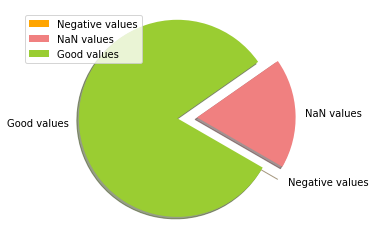

In [18]:
def plot_corruption(total_values, total_neg_count, total_nan_count):
    neg_fraction = total_neg_count / total_values * 100
    nan_fraction = total_nan_count / total_values * 100
    ok_fraction  =  (total_values - (neg_fraction + nan_fraction)) / total_values * 100

    # Data to plot
    labels = 'Negative values', 'NaN values', 'Good values'
    sizes = [neg_fraction, nan_fraction, ok_fraction]
    colors = ['orange', 'lightcoral', 'yellowgreen']
    explode = (0.2, 0.2, 0)  # explode 1st and 2nd slice

    # Plot
    patches, texts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=330)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.show()
    
total_values = merged_df.shape[0] * merged_df.shape[1]
plot_corruption(total_values, total_neg_count, total_nan_count)

### 4.5 Checking for NaN rows

In [19]:
def check_nan_rows(df):
    ## Store all rows with NaN values
    nan_df = df[pd.isnull(df).any(axis=1)]
    print('>>> Number of rows that have at least ONE NaN value:', len(nan_df.index))
    #display(nan_df.head())

    ## List only rows that have NaN values (in all columns)
    nan_rows_df = nan_df[nan_df.isnull().all(1)]      
    nan_rows_count = len(nan_rows_df.index)
    print('>>> Number of rows completely filled with NaN values:', nan_rows_count)    
    #display(nan_rows_df.head())

    if (nan_rows_count != 0):
        print('>>> Oopsie! Found', nan_rows_count, 'NaN rows:')
        display(nan_rows_df.head())
        
check_nan_rows(merged_df)        

>>> Number of rows that have at least ONE NaN value: 1201209
>>> Number of rows completely filled with NaN values: 0


### 4.6 Dealing with dirty data
From our investigation it's clear that the only thing that neededs fixing are some columns with *NaN* values. It's important to note that **251051** *NaNs* appeared after merging with `air_visit_df`. Since this particular dataframe lacked most columns, *NaN* values ended up being used to fill those empty spots. Here's the count table once again:

In [20]:
display(nan_count_df)

,NaN values count
air_store_id,857780
area_name,251051
genre_name,251051
hpg_store_id,343429
latitude,251051
longitude,251051
reserve_datetime,251051
reserve_visitors,0
visit_datetime,251051
visit_date,0


#### 4.6.1 Fixing NaNs in `air_store_id`

In [21]:
# TODO: maybe it can be retrieved from rows with equal latitude and longitude coordinates?

#### 4.6.2 Fixing NaNs in `area_name`

In [22]:
# TODO: maybe it can be retrieved from rows with equal latitude and longitude coordinates?

#### 4.6.3 Fixing NaNs in `genre_name`

In [23]:
# TODO: maybe it can be retrieved from rows with equal latitude and longitude coordinates?

#### 4.6.4 Fixing NaNs in `hpg_store_id`

In [24]:
# TODO: maybe it can be retrieved from rows with equal latitude and longitude coordinates?

#### 4.6.5 Fixing NaNs in `latitude` and `longitude`

In [25]:
# TODO: maybe it can be retrieved from rows with equal ID (air/hpg)

#### 4.6.6 Fixing NaNs in `reserve_datetime`

In [26]:
# TODO: is it important?

#### 4.6.7 Fixing NaNs in `visit_datetime`

In [27]:
# TODO: can we make up the time and retrieve the data from visit_date?

#### 4.6.8 Fixing NaNs in `visit_date`

In [28]:
# visit_date has inconsistent formats: some values are '2016-01-01 00:00:00' and others are just '2017-03-17'
merged_df["visit_date"] = pd.to_datetime(merged_df["visit_date"], format='%Y-%m-%d', errors='coerce')
display(merged_df[merged_df.visit_date.isnull()].head())   # after coerce, check for bad dates:
merged_df['visit_date'] = merged_df['visit_date'].dt.date  # convert datetime to date

,air_store_id,area_name,genre_name,hpg_store_id,latitude,longitude,reserve_datetime,reserve_visitors,visit_datetime,visit_date,day_of_week,holiday_flg


#### 4.6.9 Fixing NaNs in `day_of_week` and `holiday_flg`
Fixing columns *day_of_week* and *holiday_flg* can be done by retrieving the missing data from `date_info_df` since the *visit_date* column is intact.

In [29]:
### My first solution got me to research a faster alternative: I talked about this on Stackoverflow:
### https://stackoverflow.com/q/49062176/176769

# debug: to shrink the dataframe even further, store only rows that have NaN values in day_of_week column
#merged_df = merged_df[merged_df['day_of_week'].isnull()]
#merged_df = merged_df.tail(10)

# Fix NaN values in day_of_week and holiday_flg by inspecting date_info_df dataframe
def fix_weekday_and_holiday(row):
    weekday = row['day_of_week']   
    holiday = row['holiday_flg']
    #print('* Evaluating weekday=', weekday, 'type=', type(weekday), 'holiday=', holiday, 'type=', type(holiday))    
        
    # search dataframe date_info_df for the appropriate value when weekday is NaN
    if (type(weekday) == float and math.isnan(weekday)):
        search_date = row['visit_date']                               
        #print('  --> weekday search_date=', search_date, 'type=', type(search_date))        
        indexes = date_info_df.index[date_info_df['calendar_date'] == search_date].tolist()
        if (len(indexes) != 1):
            print('  --> weekday search_date=', search_date, 'indexes sz=', len(indexes))

        idx = indexes[0]                
        weekday = date_info_df.at[idx,'day_of_week']
        #print('  --> weekday search_date=', search_date, 'is', weekday)        
        row['day_of_week'] = weekday        
        
    # search dataframe date_info_df for the appropriate value when holiday is NaN
    if (type(holiday) == float and math.isnan(holiday)):
        search_date = row['visit_date']                               
        #print('  --> holiday search_date=', search_date, 'type=', type(search_date))        
        indexes = date_info_df.index[date_info_df['calendar_date'] == search_date].tolist()
        if (len(indexes) != 1):
            print('  --> holiday search_date=', search_date, 'indexes sz=', len(indexes))

        idx = indexes[0]                
        holiday = date_info_df.at[idx,'holiday_flg']
        #print('  --> holiday search_date=', search_date, 'is', holiday)        
        row['holiday_flg'] = int(holiday)
        
    return row

In [30]:
# slow_approach() uses the previous function fix_weekday_and_holiday to iterate through every row and copy the relevant data
def slow_approach():
    global merged_df
    
    print('>>> apply() is working, wait ~4min...')
    merged_df = merged_df.apply(fix_weekday_and_holiday, axis=1)     # send every row to fix_weekday_and_holiday
    print('>>> apply() finished!\n')

    # round holiday_flg column data from 1.0 to 1
    #merged_df['holiday_flg'] = merged_df['holiday_flg'].astype(int)

In [31]:
# fast_approach() uses a map, similar to a dictionary that does key-value replacement base on the dictionary.
# Map can also take a series where the index are treated as keys and the values of the series are treated as values.
def fast_approach():
    global merged_df
    
    merged_df.visit_date = pd.to_datetime(merged_df.visit_date) 
    date_info_df.calendar_date = pd.to_datetime(date_info_df.calendar_date) 

    # set "calendar_date" as the index such that 
    # mapping["day_of_week"] and mapping["holiday_flg"] will be two series
    # with date_info_df["calendar_date"] as their index.    
    mapping = date_info_df.set_index("calendar_date") 
    
    # do replacement here.
    merged_df["day_of_week"] = merged_df.visit_date.map(mapping["day_of_week"]) 
    merged_df["holiday_flg"] = merged_df.visit_date.map(mapping["holiday_flg"])

In [32]:
# save relevant data to file
#merged_df.to_csv('full_merged_data.csv')
#date_info_df.to_csv('full_date_info_data.csv')

print('merged_df BEFORE=', merged_df.shape)
#display(merged_df.tail())

#%time slow_approach() # 4min 5s
%time fast_approach() # 5.87 s

# Convert data from float to int (to remove decimal places)
#merged_df['holiday_flg'] = merged_df['holiday_flg'].astype(int)

print('merged_df  AFTER=', merged_df.shape)
display(merged_df.tail())

merged_df BEFORE= (1214737, 12)
Wall time: 5.75 s
merged_df  AFTER= (1214737, 12)


,air_store_id,area_name,genre_name,hpg_store_id,latitude,longitude,reserve_datetime,reserve_visitors,visit_datetime,visit_date,day_of_week,holiday_flg
1214732,air_24e8414b9b07decb,NaN,NaN,NaN,NaN,NaN,NaN,6,NaT,2017-04-18,Tuesday,0
1214733,air_24e8414b9b07decb,NaN,NaN,NaN,NaN,NaN,NaN,6,NaT,2017-04-19,Wednesday,0
1214734,air_24e8414b9b07decb,NaN,NaN,NaN,NaN,NaN,NaN,7,NaT,2017-04-20,Thursday,0
1214735,air_24e8414b9b07decb,NaN,NaN,NaN,NaN,NaN,NaN,8,NaT,2017-04-21,Friday,0
1214736,air_24e8414b9b07decb,NaN,NaN,NaN,NaN,NaN,NaN,5,NaT,2017-04-22,Saturday,0


#### 4.6.10 Final Validation
Once again, count the number of *NaNs* in the database to see if there were any improvements:

In [33]:
check_invalid(merged_df)
display(nan_count_df)

,NaN values count
air_store_id,857780
area_name,251051
genre_name,251051
hpg_store_id,343429
latitude,251051
longitude,251051
reserve_datetime,251051
reserve_visitors,0
visit_datetime,251051
visit_date,0


## 5 Preliminary Visual Exploratory Data Analysis
Plot the number of reservations (per week) in contrast with the number of visitations (per week).

In [34]:
# debug: cut the size of the dataframe to 10 rows
#merged_df = merged_df.head(100)

display(merged_df.head(3))
print(">>> Min date:", merged_df.visit_datetime.min())
print(">>> Max date:", merged_df.visit_datetime.max())

# compute the number of unique days:
print(">>> Number of days:", len(merged_df['visit_datetime'].dt.normalize().value_counts().index))

,air_store_id,area_name,genre_name,hpg_store_id,latitude,longitude,reserve_datetime,reserve_visitors,visit_datetime,visit_date,day_of_week,holiday_flg
0,NaN,Hyōgo-ken Kōbe-shi None,French,hpg_dac72789163a3f47,34.692109,135.191698,2016-01-01 06:00:00,3,2016-01-01 13:00:00,2016-01-01,Friday,1
1,NaN,Fukuoka-ken Fukuoka-shi None,Japanese style,hpg_28bdf7a336ec6a7b,33.589806,130.400170,2016-01-01 14:00:00,3,2016-01-01 19:00:00,2016-01-01,Friday,1
2,NaN,Fukuoka-ken Fukuoka-shi None,Japanese style,hpg_28bdf7a336ec6a7b,33.589806,130.400170,2016-01-01 18:00:00,3,2016-01-01 20:00:00,2016-01-01,Friday,1


>>> Min date: 2016-01-01 13:00:00
>>> Max date: 2017-05-31 23:00:00
>>> Number of days: 517


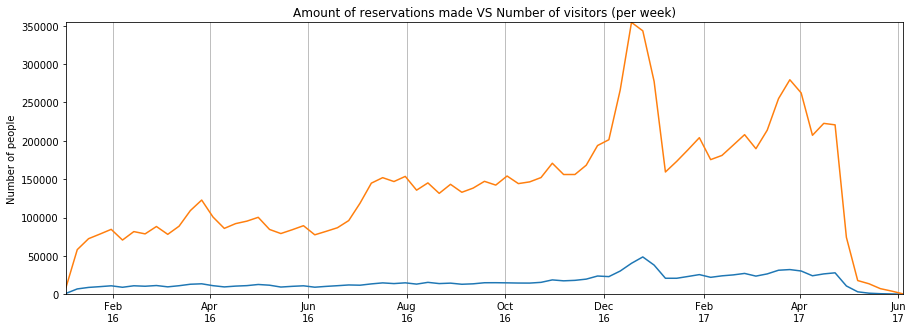

In [39]:
#visit_reserve_df = pd.concat([merged_df['visit_date'], merged_df['reserve_visitors']], axis=1, keys=['date', 'reservations'])
#visit_reserve_df = pd.merge(visit_reserve_df, mylist[i], how = 'outer', on = 'visit_date')

merged_df.set_index(merged_df["visit_date"], inplace=True)
reservations_made_df = merged_df.resample('W').apply({'reserve_visitors':'count'})
visitors_df = merged_df.resample('W').apply({'reserve_visitors':'sum'})

activity_df = pd.concat([reservations_made_df, visitors_df], join='inner', axis=1)
activity_df.columns = ['reservations_made', 'visitors']

#display(activity_df.head())

fig, ax = plt.subplots(figsize=(15,5))

# There's a bug in Pandas' plot() that handles data differently than Matplotlib's plot()
# What this means is that if you use Pandas' plot() you cannot change xticks values later.
#ax = activity_df.plot(kind='area', ax=ax, stacked=True, title='Reservations made and number of visitors (per week)')

# alternative method: use matplotlib's plot_date() and configure xticks at will
plt.plot_date(activity_df.index.to_pydatetime(), activity_df, fmt='-')
plt.title('Amount of reservations made VS Number of visitors (per week)')
ax = plt.gca()
ax.xaxis.grid(True, which="major")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

ax.set_ylabel('Number of people')
ax.margins(0, 0) # Set margins to avoid "whitespace"
plt.show()